# 帰無仮説

[統計学が最強の学問である[実践編]――データ分析のための思想と方法](https://amzn.asia/d/ifHoafB) の第二章で「カラスが黒い」という仮説に絡めて帰無仮説と信頼区間の解説があります。その例を元に、帰無仮説とP値、それと信頼区間を可視化しました。

まず、この「カラスは黒い」の例を概念図として以下のようになります。

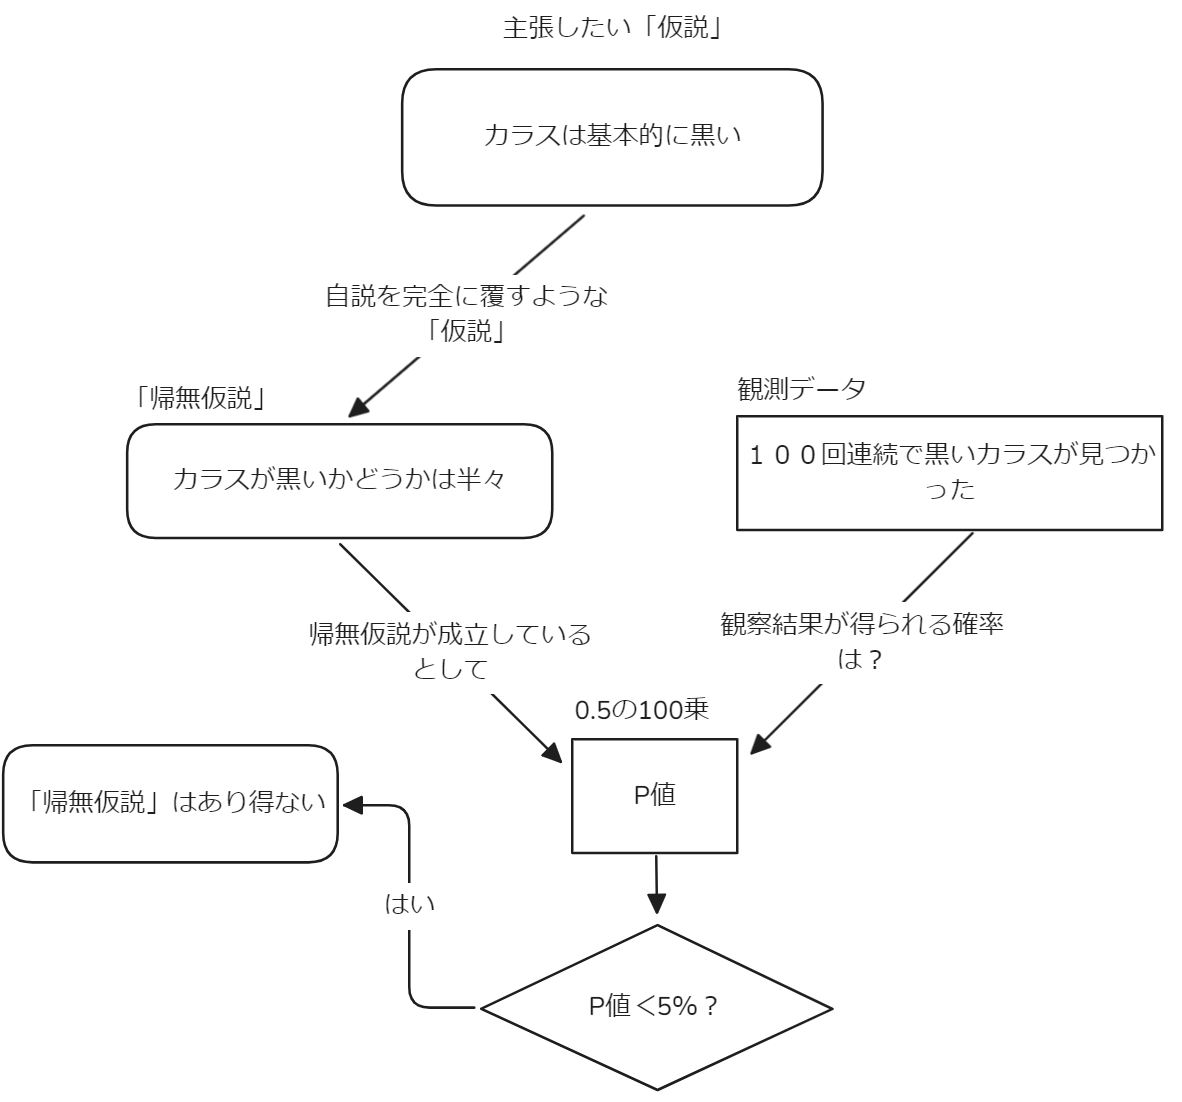

本中では「カラスが黒い確率が50%」という帰無仮説はじめ、いくつかの確率のでの帰無仮説を例にしています。それらを５％を目安に「帰無仮説がありえない」か「帰無仮説を棄却できない」ものに分けている様子をまとめると以下のようになります。

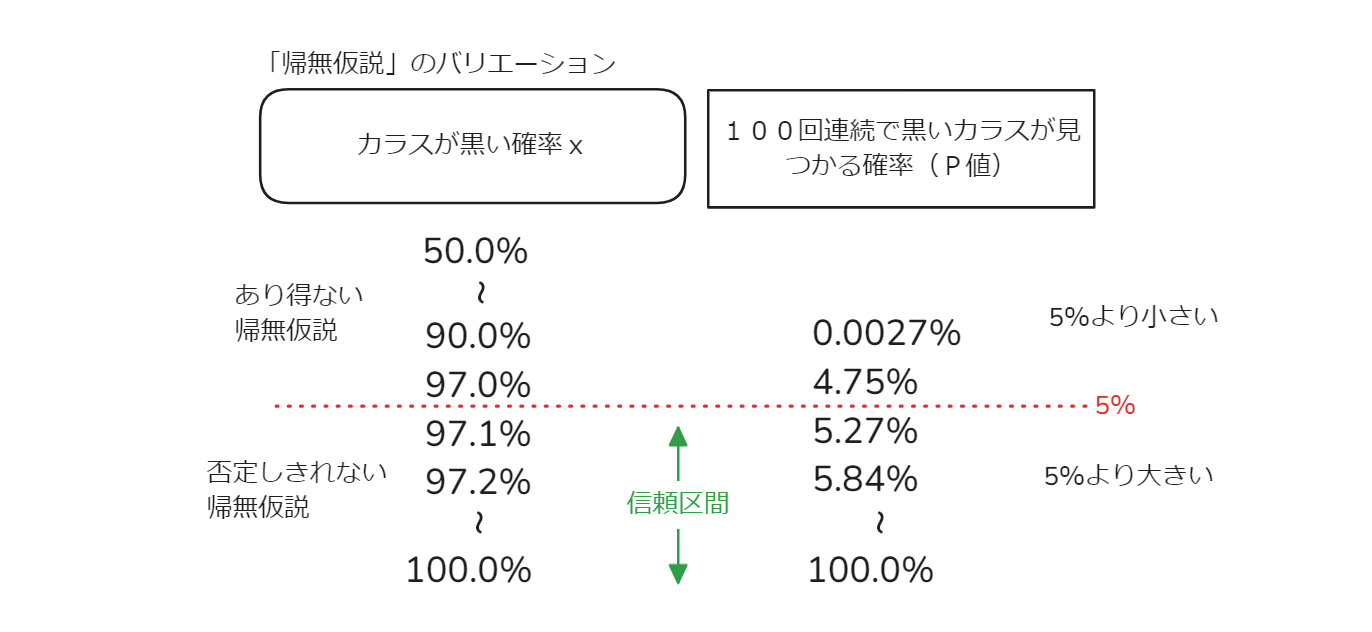

次に、異なる帰無仮説と、対応するP値をプロットします。

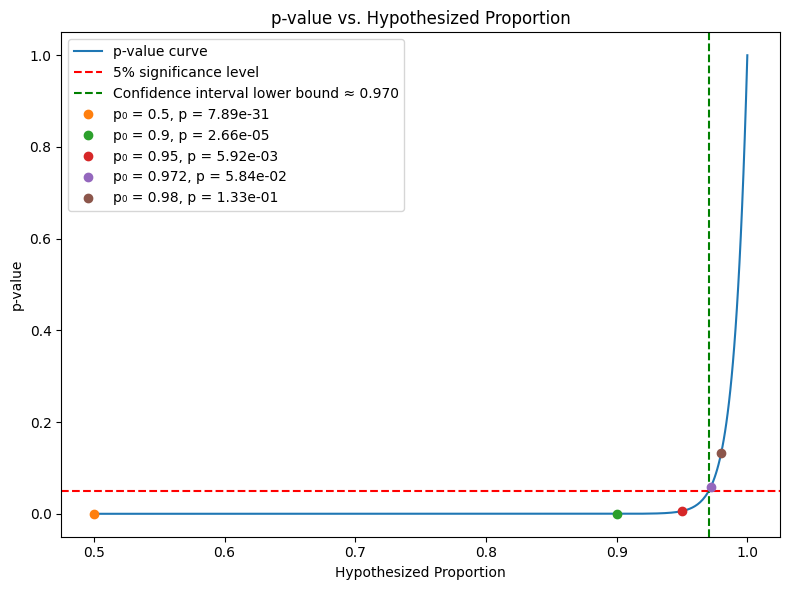

95% Clopper-Pearson Confidence Interval: [0.964, 1.000]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from statsmodels.stats.proportion import proportion_confint

# Observed data: 100 black crows out of 100
n = 100
x = 100

# Define a range of null hypothesized proportions to test
p0_values = np.linspace(0.5, 1.0, 500)

# For a one-tailed test (alternative: proportion > p0),
# the p-value for observing 100 successes is:
#    p_value = P(X >= 100) = binom.sf(99, n, p0) = p0**100.
p_values = np.array([binom.sf(x - 1, n, p0) for p0 in p0_values])

# Find the threshold p0 for which p_value equals 0.05.
# Solve: p0^100 = 0.05  ->  p0 = 0.05^(1/100)
threshold = np.power(0.05, 1/100)

# Plot the p-value curve against the hypothesized proportion
plt.figure(figsize=(8, 6))
plt.plot(p0_values, p_values, label='p-value curve')
plt.axhline(0.05, color='red', linestyle='--', label='5% significance level')
plt.axvline(threshold, color='green', linestyle='--',
            label=f'Confidence interval lower bound ≈ {threshold:.3f}')

# Annotate specific null hypotheses (e.g., 0.50, 0.90, 0.95, 0.972, 0.98)
for p_val in [0.5, 0.9, 0.95, 0.972, 0.98]:
    p_val_p = binom.sf(x - 1, n, p_val)
    plt.plot(p_val, p_val_p, 'o', label=f'p₀ = {p_val}, p = {p_val_p:.2e}')

plt.xlabel('Hypothesized Proportion')
plt.ylabel('p-value')
plt.title('p-value vs. Hypothesized Proportion')
plt.legend()
plt.tight_layout()
plt.show()

# Compute the conventional 95% Clopper-Pearson confidence interval for the true proportion
ci_low, ci_upp = proportion_confint(count=x, nobs=n, alpha=0.05, method='beta')
print(f'95% Clopper-Pearson Confidence Interval: [{ci_low:.3f}, {ci_upp:.3f}]')


上のプロットから分かること。

- 橙の点：「カラスが黒い確率が50%」と仮定して「100羽続けて黒いカラスに遭遇する確率」はほとんどゼロ。
- 緑の点：「カラスが黒い確率が90%」と仮定して「100羽続けて黒いカラスに遭遇する確率」もほとんどゼロ。
- 赤の点：「カラスが黒い確率が95%」と仮定して「100羽続けて黒いカラスに遭遇する確率」もかなりゼロに近い。
- 紫の点：「カラスが黒い確率が97.2%」と仮定して「100羽続けて黒いカラスに遭遇する確率」は5.8%ぐらい（5％を超える）
- 茶の点：「カラスが黒い確率が98.0%」と仮定して「100羽続けて黒いカラスに遭遇する確率」は13.3%ぐらい（100%に向かい始める）

赤い点線がちょうどP値＝5%のところで

- 「左側」はP値が5％より小さい＝＞確率が小さすぎるので、その帰無仮説はあり得ない言える
- 「右側」ではP値が5％より大きい＝＞20回に1回程度かそれ以上起こりうるので、その帰無仮説は棄却的るとは言えない（つまり『あり得る』と言える）





# P値と帰無仮説と信頼区間の関係

**信頼区間 Confidence Interval** ：信頼区間は「平均値＋－2SE」で表すことが出来る。「あり得る仮説」と「あり得ない仮説」を分ける境目を区分で示す。

「あるP値」がその帰無仮説における信頼区間（受容域）に現れなければ、その帰無仮説は棄却される。

同様のアニメーションをp5.js で実装したページは以下のリンクから開きます。

（プレビュー）
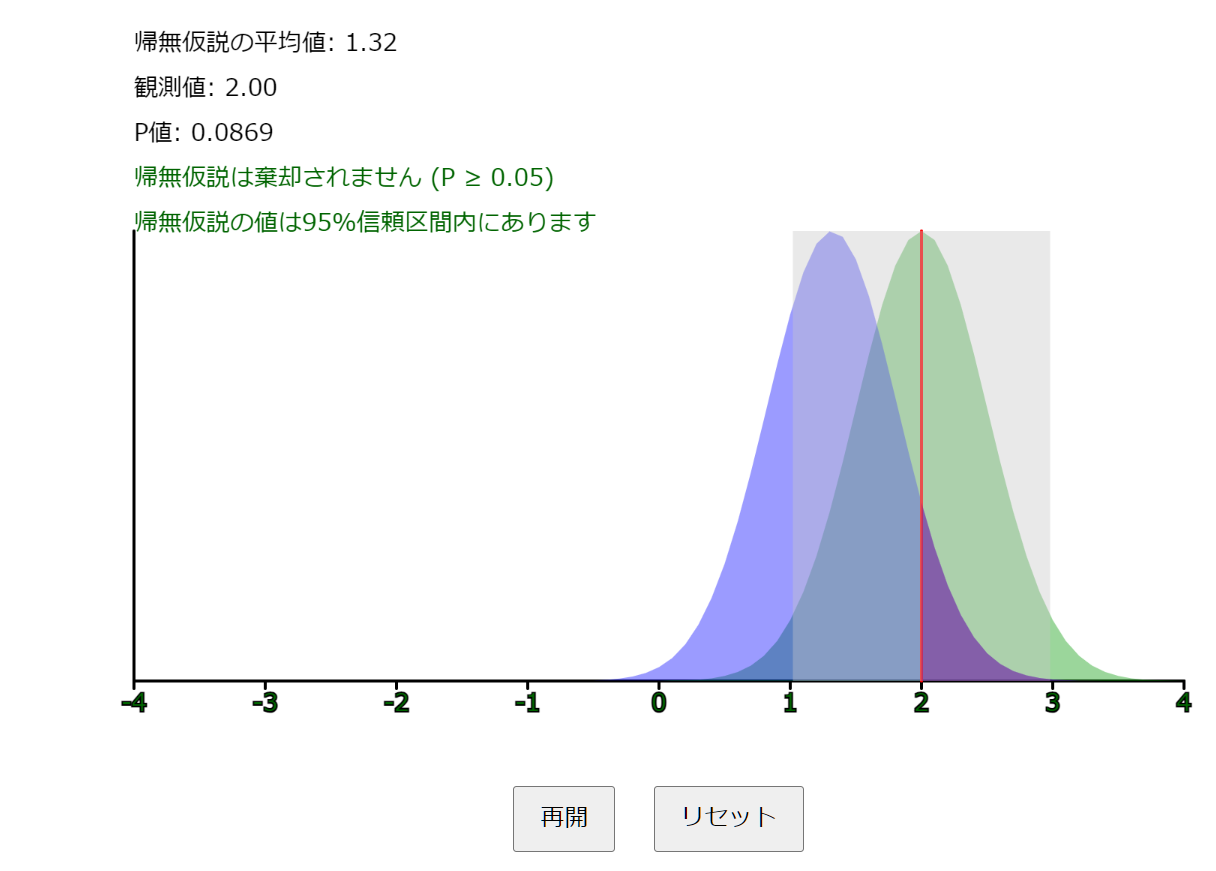

[P値と帰無仮説と信頼区間の関係のアニメーションのページを開く](https://yoshiwatanabe.github.io/python-test/null_hypothesis.html)

